**Question 1:**

The Simple Linear Regression model is used to explain/estimate the relationship between $Y$ (the dependent variable) known as the outcome and the independent variable $x$ known as the predictor. The two primary parameters of the model, that being $\beta_0$ (the intercept) and $\beta_1$ (the slope), describe the relationship between the outcome and the predictor, with $\beta_0$ representing the expected value for the outcome when the predictor value is 0, and $\beta_1$ representing the expected change in the value of the outcome when the predictor value changes by one unit. The error term added to the end of the model represents the random/unexplained deviations from the predicted outcomes in relation to the linear relation dictated by $x$. 

These components combine to form a sample from normal distribution through the assumption that the error term follows a normal distribution with a mean of zero and a variance of sigma squared. Since the linear relation between Y and x is constant (predictable) and $Y = \beta_0 + \beta_1*x + e$, the result is that $Y$ follows the normal distribution that the error term follows, except that the mean is shifted by the $\beta_0 + \beta_1*x$ while the variance remains the same, as the linear relation does not change the variance as it has no variability. Basically, since the error term is normally distributed, Y must also be normally distributed due to the randomness/variability that the error term introduces. 

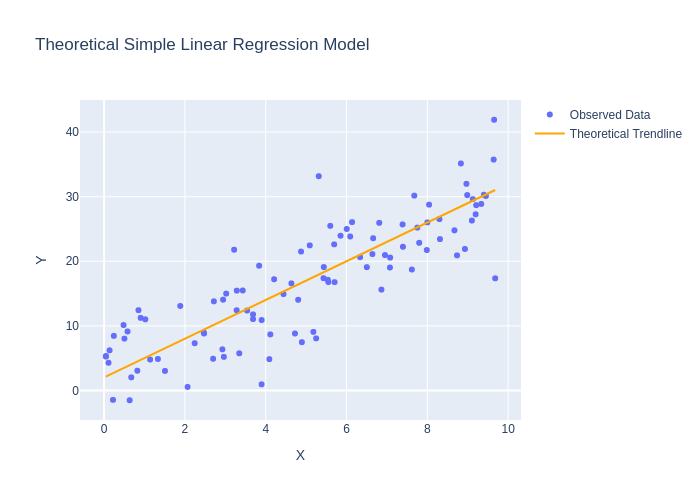

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(78)

# Parameters for the regression
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 5    # Standard deviation of the error term
n = 100      # Number of data points

# Generate independent variable X
X = np.random.uniform(0, 10, n)

# Generate the error term epsilon
epsilon = np.random.normal(0, sigma, n)

# Calculate the dependent variable Y based on the theoretical model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
df = pd.DataFrame({'X': X, 'Y': Y})

# Create the figure using Plotly Graph Objects
fig = go.Figure()

# Add scatter plot of observed data
fig.add_trace(go.Scatter(x=df['X'], y=df['Y'], mode='markers', name='Observed Data'))

# Calculate the theoretical linear trendline (without noise)
Y_theoretical = beta_0 + beta_1 * df['X']

# Add trendline (theoretical values) to the plot
fig.add_trace(go.Scatter(x=df['X'], y=Y_theoretical, mode='lines', name='Theoretical Trendline', line=dict(color='orange')))

# Update layout
fig.update_layout(title='Theoretical Simple Linear Regression Model',
                  xaxis_title='X',
                  yaxis_title='Y',
                  showlegend=True)

# Show the plot
fig.show(renderer="png")

As we can see, the inclusion of the error term results in the actual outcomes deviating well away from the simple linear model (the estimated relation between Y and x), yet even with that variance, the relation between Y and x can be seen in the generated outcomes (even if the simple linear model was not there to visualize the predicted relation).

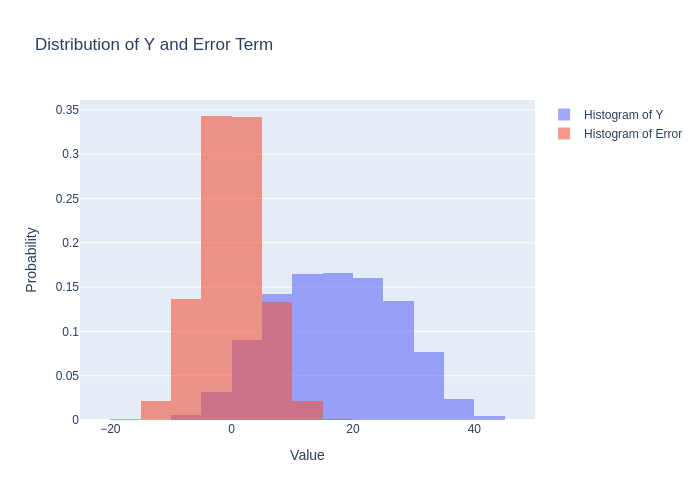

In [2]:
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(78)

# Parameters for the regression
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 5    # Standard deviation of the error term
n = 100000      # Number of data points

# Generate independent variable X
X = np.random.uniform(0, 10, n)

# Generate the error term epsilon
epsilon = np.random.normal(0, sigma, n)

# Calculate the dependent variable Y based on the theoretical model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
df = pd.DataFrame({'X': X, 'Y': Y, 'Error': epsilon})

# Create the figure using Plotly Graph Objects for the distribution of Y and Error
fig = go.Figure()

# Add histogram of Y values
fig.add_trace(go.Histogram(x=df['Y'], nbinsx=20, name='Histogram of Y', opacity=0.6, histnorm='probability'))

# Add histogram of Error term
fig.add_trace(go.Histogram(x=df['Error'], nbinsx=20, name='Histogram of Error', opacity=0.6, histnorm='probability'))

# Update layout
fig.update_layout(title='Distribution of Y and Error Term',
                  xaxis_title='Value',
                  yaxis_title='Probability',
                  barmode='overlay',  # Overlay the histograms
                  showlegend=True)

# Show the plot
fig.show(renderer="png")

Visualized here is the normal distribution of the error term (which you can see has a mean of 0), and the distribution of the Y. Noticable here, the distribution of Y is normal, and we can also see how the mean of Y is shifted away from 0 (as the mean of the distribution that Y follows is beta0 + beta1\*x).

**Question 2:**

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           9.82e-29
Time:                        20:51:15   Log-Likelihood:                -302.98
No. Observations:                 100   AIC:                             610.0
Df Residuals:                      98   BIC:                             615.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1371      1.002      3.132      0.0

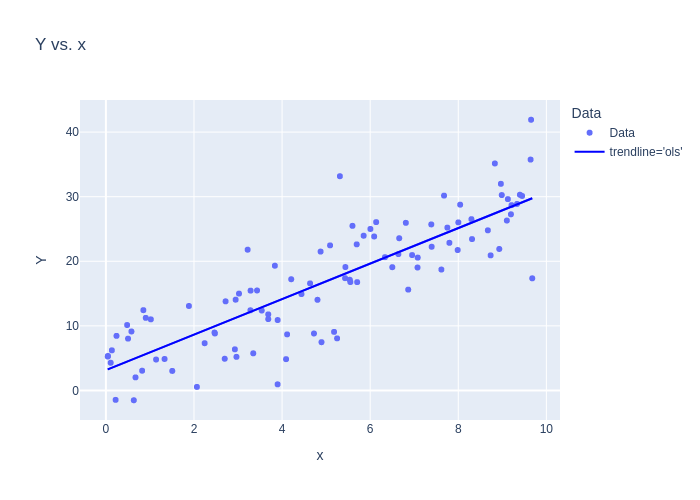

In [3]:
import statsmodels.formula.api as smf  # Importing the statsmodels library for regression analysis

# Set random seed for reproducibility
np.random.seed(78)

# Parameters for the regression
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 5   # Standard deviation of the error term
n = 100      # Number of data points

# Generate independent variable X
X = np.random.uniform(0, 10, n)

# Generate the error term epsilon
epsilon = np.random.normal(0, sigma, n)

# Calculate the dependent variable Y based on the theoretical model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
df = pd.DataFrame({'x': X, 'Y': Y})

# Fit the OLS (Ordinary Least Squares) model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifying the OLS model using a formula
fitted_model = model_data_specification.fit()  # Fitting the model to the data

# Displaying the model summary
print(fitted_model.summary())  # Gives a detailed summary of the fitted model
print(fitted_model.summary().tables[1])  # Extracts the table with coefficients and their statistics
print(fitted_model.params)  # Returns the estimated parameters (intercept and slope)
print(fitted_model.params.values)  # Returns the estimated parameters as a NumPy array
print(fitted_model.rsquared)  # Returns the R-squared value indicating the model fit

# Adding a new column to the DataFrame for legend purposes
df['Data'] = 'Data'  # This creates a label for the data points

# Creating a scatter plot of the observed data with a trendline
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Adding the fitted model line manually to the figure (essentially what 'trendline='ols'' does)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                 line=dict(color='blue'), name="trendline='ols'")

# Show the plot using PNG format for submissions
fig.show(renderer="png")

**Note:** Basically all of the added comments were done by ChatGPT before I even had a chance to answer them myself, but I probably would've answered them close to that anyways (probably).

**Question 3:**

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           9.82e-29
Time:                        20:51:15   Log-Likelihood:                -302.98
No. Observations:                 100   AIC:                             610.0
Df Residuals:                      98   BIC:                             615.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1371      1.002      3.132      0.0

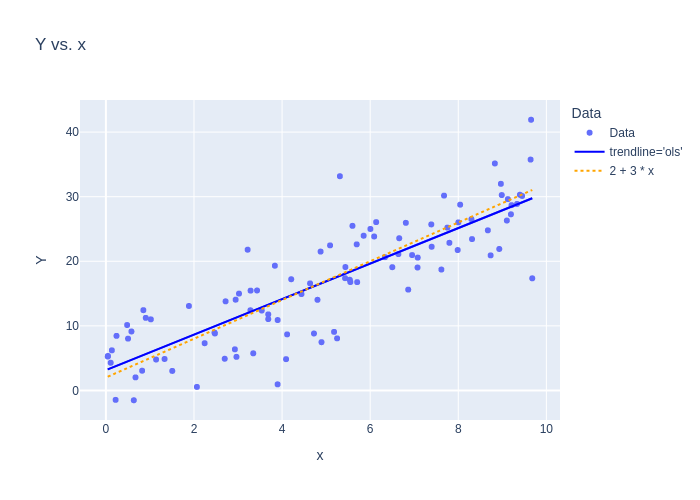

In [4]:
# Set random seed for reproducibility
np.random.seed(78)

# Parameters for the regression
beta_0 = 2  # Intercept
beta_1 = 3  # Slope
sigma = 5   # Standard deviation of the error term
n = 100      # Number of data points

# Generate independent variable X
X = np.random.uniform(0, 10, n)

# Generate the error term epsilon
epsilon = np.random.normal(0, sigma, n)

# Calculate the dependent variable Y based on the theoretical model
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the data
df = pd.DataFrame({'x': X, 'Y': Y})

# Fit the OLS (Ordinary Least Squares) model
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifying the OLS model using a formula
fitted_model = model_data_specification.fit()  # Fitting the model to the data

# Displaying the model summary
print(fitted_model.summary())  # Gives a detailed summary of the fitted model
print(fitted_model.summary().tables[1])  # Extracts the table with coefficients and their statistics
print(fitted_model.params)  # Returns the estimated parameters (intercept and slope)
print(fitted_model.params.values)  # Returns the estimated parameters as a NumPy array
print(fitted_model.rsquared)  # Returns the R-squared value indicating the model fit

# Adding a new column to the DataFrame for legend purposes
df['Data'] = 'Data'  # This creates a label for the data points

# Creating a scatter plot of the observed data with a trendline
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Adding the fitted model line manually to the figure (essentially what 'trendline='ols'' does)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                 line=dict(color='blue'), name="trendline='ols'")

# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Show the plot using PNG format for submissions
fig.show(renderer="png")

The difference between the nature of the two lines is that the fitted line (the yellow, dotted line) approximates the relationship between x and Y, taking into account the noise of the actual data, while the theoretical line (the blue line) represents the actual relation between x and Y, absent of any noise. That is why the fitted line deviates away from the theoretical line, as the fitted line represents (is made to fit) the actual data.

**Question 4:**

fitted_model.fittedvalues is derived on the basis of fitted_model.params.values because fitted_model.params.values estimates the parameters of the regression line ($\hat{\beta}_0$ and $\hat{\beta}_1$) based off the given data, after which fitted_model.fittedvalues uses those estimated parameters in the linear regression equation ($\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1x_i$) to produce the predicted outcomes ($\hat{y}$) for each value of $x$, according to the fitted parameters.

**Question 5:**

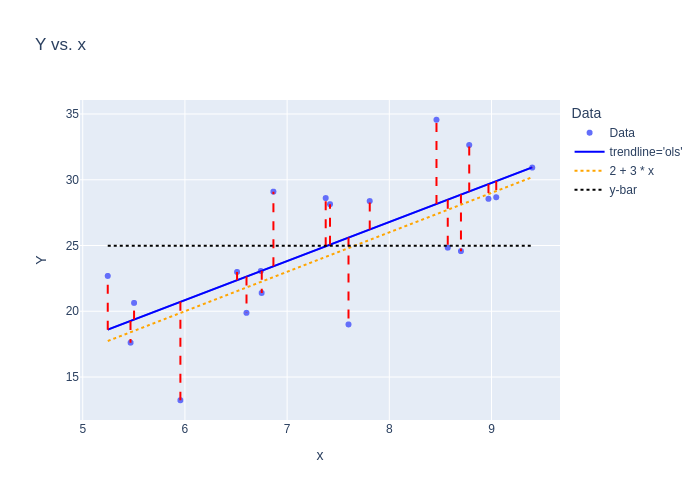

In [5]:
import scipy.stats as stats

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The line that is chosen for the fitted model based on observed data using the OLS method is a line that minimizes the sum of the residuals for each predicted of value of $y$. The reason why the method requires squares is because the residuals can be both negative and positive, meaning that squaring is required so that the residuals can add with each other and not cancel each other out. There is also a reason why the squares are not rooted after to obtain the raw distance, because by squaring the larger residuals their values are amplified, causing the line to better fit any larger deviations since the OLS method would be more sensitive to those larger outliers.

**Question 6:**

The first expression can be interpreted as "the proportion of variation in Y explained by the model" because it's just the formula for $R^2$, which is defined as "the proportion of variation in Y explained by the model." fitted_model.rsquared can be interpreted as the measure of accuracy of the model since $R^2$ informs us of the proportion of variation in Y explained by the fitted model, so we can say a model is accurate if the fitted model "explains" a large proportion of the variation in Y, and inaccurate otherwise. 

What the two *np.corrcoef(...)[0,1]\*\*2* expressions capture in the context of Simple Linear Regression models is that both expressions calculate the squared correlation coefficient between a dependent variable and independent variable, with the result showing you how strong the linear relation is between the dependent and independent variable.

For the former expression, *np.corrcoef(Y,fitted_model.fittedvalues)[0,1]\*\*2*, calculates the squared corrleation coefficient between the $Y$ and $\hat{Y}$, which happens to be $R^2$ (it's telling you how well the model fits the observed data). The latter expression, *np.corrcoef(Y,x)[0,1]\*\*2*, calculates the squared correlation coefficient between $Y$ and $x$, which just tells you how strong the linear relationship of $Y$ and $x$ is.

For both calculations, the produced value is between 0 and 1, with a value of 0 meaning that either a small proportion of the variation in $Y$ is explained by the model **(former)** or that there is a weak linear relationship between $Y$ and $x$ **(latter)**, while a value of 1 means that a large proportion of the variation in $Y$ is explained by the model **(former)** or that there is a strong linear relationship between $Y$ and $x$ **(latter)**.

**Question 7:**

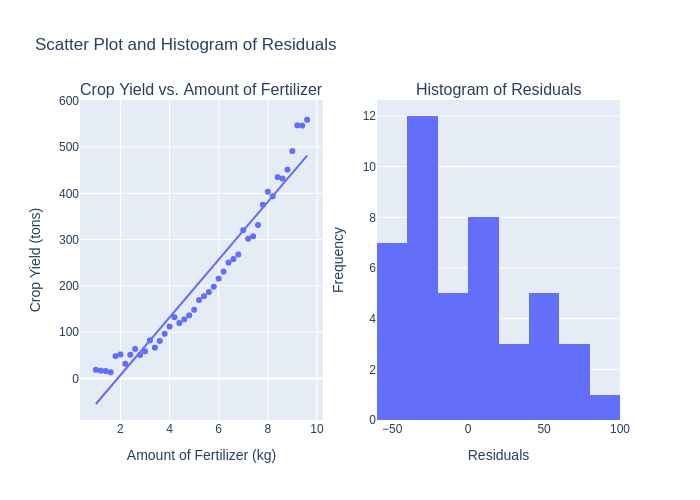

In [6]:
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

One assumption that cannot be made is that $e_i$ follows a normal distribution with mean 0, as the histogram of the residuals are skewed, showing that $e_i$ is unevenly spread. 

Another assumption that cannot be made is that $Y_i$ can be represented on average by the linear equation. Unlike the assumption of the linear regression model, which would assume and predict that every time you add more fertilizer, the yield proportionally increases, the observations show that the yield has exponetial increases as you add more fertilizer, with negligible differences between small amounts of fertilizer and noticable differences between large amounts of fertilizer. Since the outcomes of the data are better represented on average by an expontential equation, we can conclude that the linear form is not true for/does not adequately determine $Y_i$ (The Crop Yield).

**Question 8:**

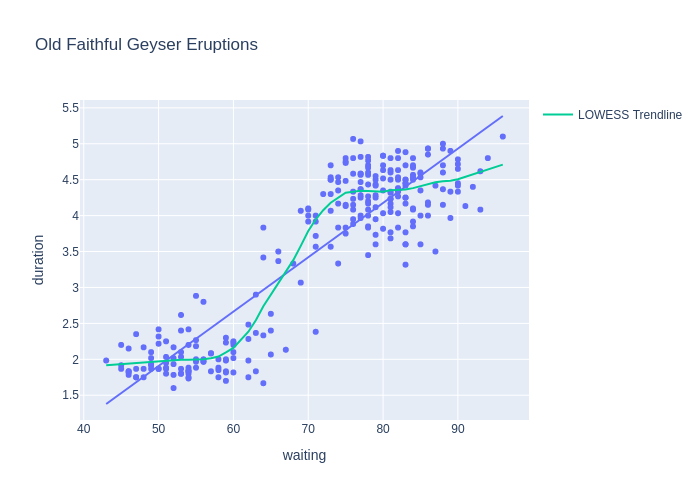

In [7]:
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

$H_0: \beta_1 = 0$ (There is no linear association (on average) between the waiting time and the duration of geysers)

In [8]:
# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        20:51:16   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since (according to the regression results) we obtain a p-value of 0, we reject the null hypothesis of no linear association (on average), meaning we have strong evidence against the null hypothesis (according to the p-value table). This suggests that there exists some linear relation between the waiting time and the duration of the geysers.

**Question 9:**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


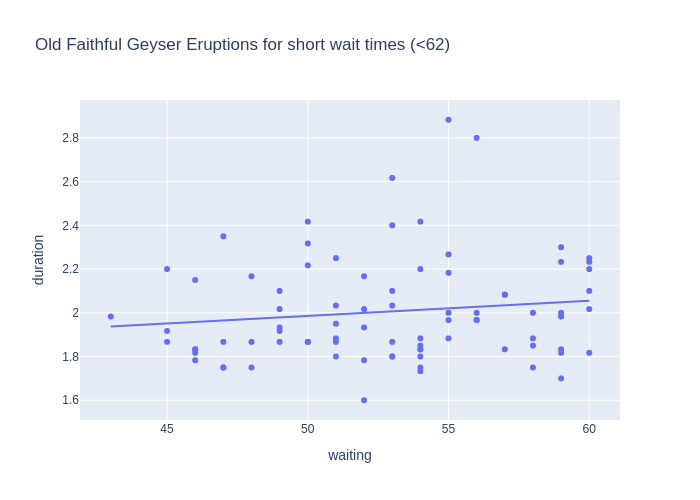

In [9]:
short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


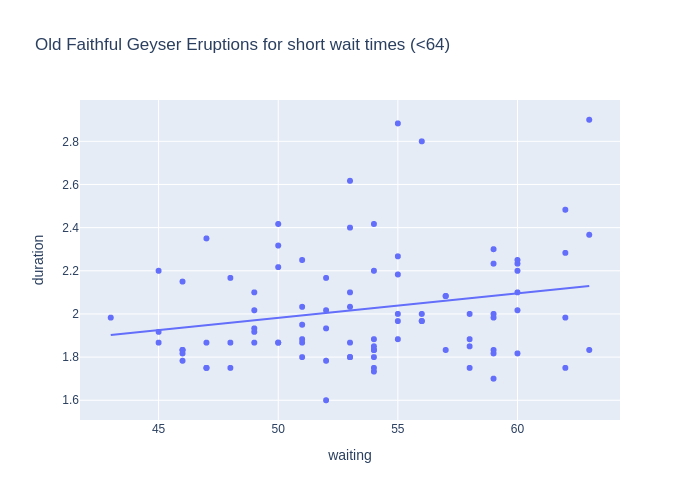

In [10]:
short_wait_limit = 64 # 66 # 62 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


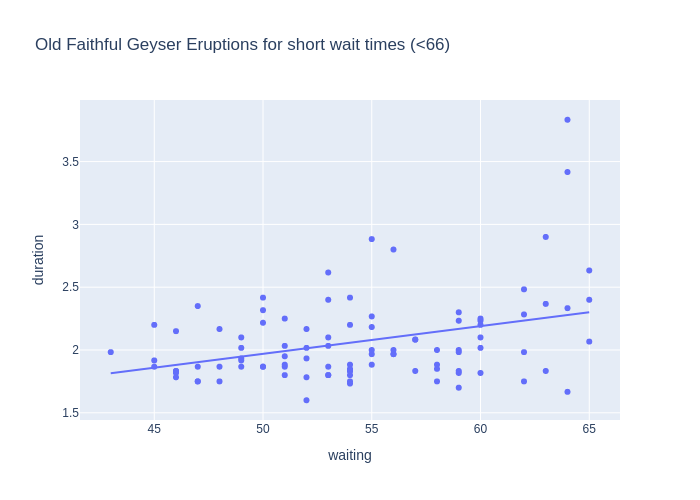

In [11]:
short_wait_limit =  66 # 62 # 64 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

$H_0: \beta_1 = 0$ (In the context of short wait times)

In the context of short wait times less than 62 minutes, we obtain a p-value of 0.238, which according to the p-value chart means we have no evidence against the null hypothesis ($p > 0$). 

In the context of short wait times less than 64 minutes, we obtain a p-value of 0.036, meaning that we have moderate evidence against the null hypothesis ($0.05 <= p < 0.01$).

In the context of short wait times less than 66 minutes, we obtain a p-value of 0, meaning that we have very strong evideance against the null hypothesis ($p < 0.001$).

When we analyze wait times less than 62 minutes, there is no evidence to reject the null hypothesis. But once we pass the 63 minute mark, where we approach wait times of 64 and 66 minutes, evidence against the null hypothesis becomes stronger, so much so that we may reject it. So, before 63 minutes, the present data does not provide evidence for a relationship between duration and wait time in the same manner as in the full data set, whereas after 63 minutes it does.

**Question 10:**

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


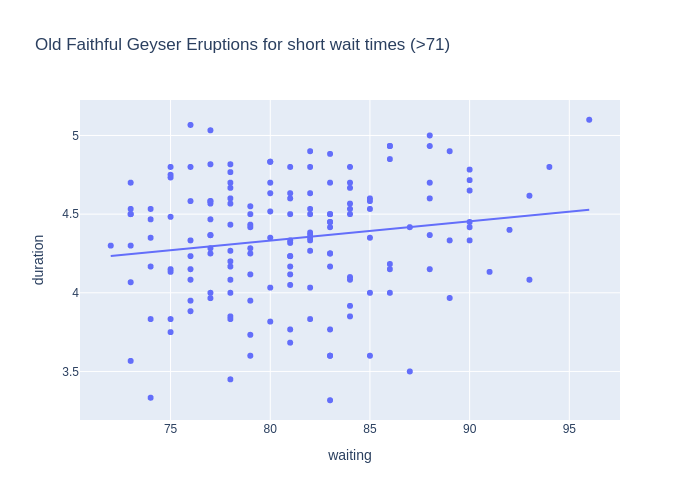

In [12]:
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

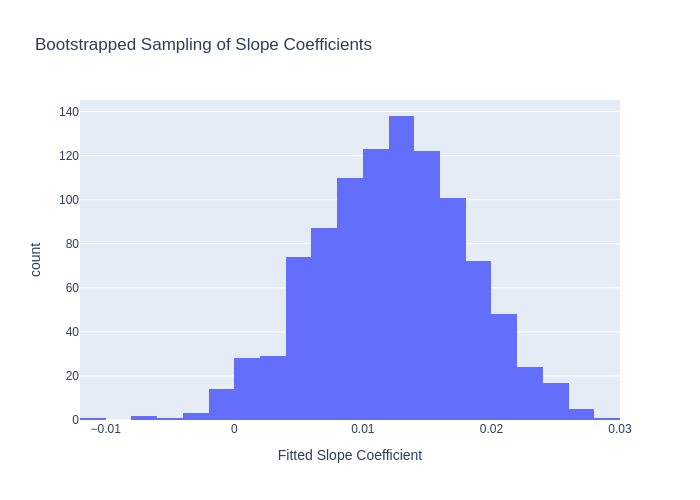

[0.00029236 0.02352084]


In [16]:
# 1.  Define Number of Bootstrap Samples
number_of_bootstrap_samples = 1000

# 2. Simulate the Bootstrapped Sampling Distribution
bootstrapped_slope_coefficients = []

for i in range(number_of_bootstrap_samples):
    # Bootstrap data and fit the model
    
    # Create a bootstrap sample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)

    # Fit the Simple Linear Regression model to the bootstrap sample
    fitted_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()

    # Return the fitted slope coefficient
    slope = fitted_model.params.iloc[1]  # Extract the slope coefficient

    # Append the fitted slope coefficient to the list
    bootstrapped_slope_coefficients.append(slope)

# 3. Visualize the Bootstrapped Sampling Distribution
fig = px.histogram(x=bootstrapped_slope_coefficients, nbins=30,
                   labels={'x':'Fitted Slope Coefficient'},
                   title='Bootstrapped Sampling of Slope Coefficients')
fig.show(renderer='png')

print(np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975]))

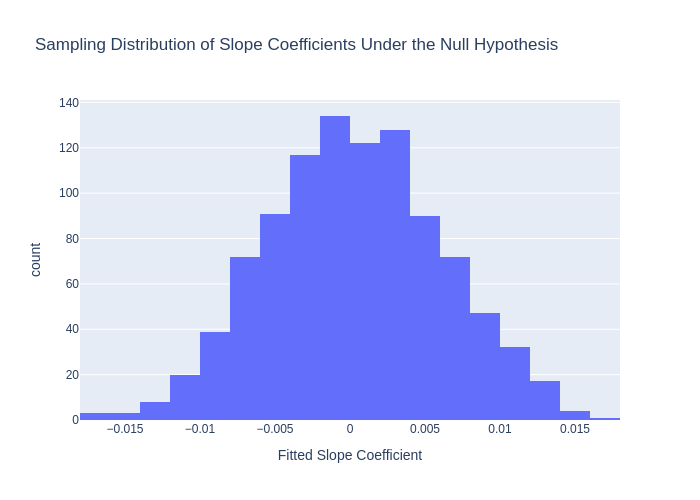

p-value: 0.026


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


In [17]:
# 1. Define the Null Hypothesis Model Parameters
beta0 = 1.65  # Intercept
beta1_null = 0  # Slope under the null hypothesis of no linear association
sigma = 0.37  # Standard deviation of the error term

old_faithful_simulation = old_faithful[long_wait].copy()

# 2. Simulate the Sampling Distribution
number_of_simulations = 1000
simulated_slope_coefficients = []

for i in range(number_of_simulations):

    # Create a bootstrap sample with replacement
    old_faithful_simulation['duration'] = beta0 + beta1_null*old_faithful_simulation.waiting + stats.norm(loc=0, scale=sigma).rvs(size=long_wait.sum())

    # Fit the Simple Linear Regression model to the bootstrap sample
    fitted_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()

    # Return the fitted slope coefficient
    slope = fitted_model.params.iloc[1]  # Extract the slope coefficient

    # Extract and store the simulated slope coefficient
    simulated_slope_coefficients.append(slope)

# 3. Visualize the Simulated Sampling Distribution
fig = px.histogram(x=simulated_slope_coefficients, nbins=30,
                   labels={'x':'Fitted Slope Coefficient'},
                   title='Sampling Distribution of Slope Coefficients Under the Null Hypothesis')
fig.show(renderer='png')

print("p-value:", (np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params.iloc[1]).mean())
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

0 is **not** contained within the 95% bootstrapped confidence interval, and the simulated p-value does **not** match the p-value reported by `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`.

**Question 11:**

The difference between the previous models and the new indicator variable model is that the previous models quantify the average change between the predictor and the outcome (wait time and duration), whereas the indicator variable model quantifies the average difference between two groups (short and long). 

The key differences is linked to the new structure of the model; the 'new' variables. $1[\text{"long"}](k_i)$ is our indicator variable. This is a binary variable, with it assuming a value of 1 if the observation belongs to the specified group/category (in this case, long), and 0 otherwise. This helps differentiate the groups. 

$\beta_\text{intercept}$ represents the average value of the outcome ($Y_i$) when the predictor is in the reference category (The category not specified by the indicator, when the indicator is 0. In our case this would represent the average duration of the disruptions when the wait time is 'small').

$\beta_\text{contrast}$ represents the average difference between the two categories. What this coefficient essentially does is captures the effect that the indicator ($k_i$ or the **category**) has on the outcome.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


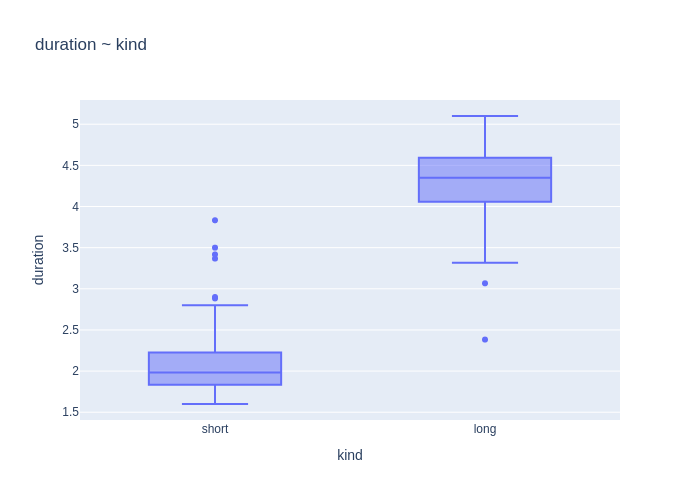

In [19]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In the case of our new *indicator variable* based model, for our null-hypothesis of "no difference between the groups 'on average'", we obtain a p-value of 0, meaning we have very strong evidence against that null-hypothesis. This suggests that there exists some difference between the groups (short and long) "on average."

**Question 12:**

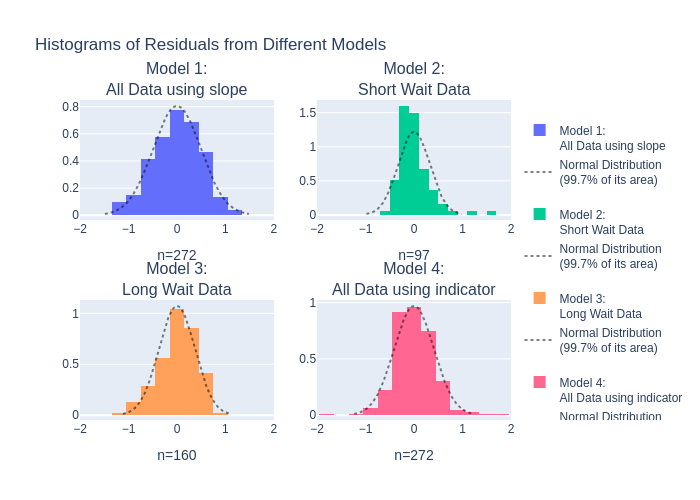

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Model one:** The histogram that suggests that the distribution of error terms is normal, since 99.7% of its area falls under a normally distributed curve (approximately 99.7% of data within a normal distribution falls within three standard deviations of its mean) and since it's symmetrically distributed. Normally distributed residuals strongly suggests that the error terms are normally distributed 

Model two: Slight right skew which follows from the unsymmetrical distribution of its values.

Model three: Slight left skew which follows from a slight unsymmetrical distribution of its values. It appears as though it is normally distributed via the overlay, but its raw shape suggests a mean and median of different values, a property unheld by symmetrical/normal distributions.

Model four: 99.7% of its data does not fit within the curve of a normal distribution. There are also a noticable amount of values beyond the third standard deviation of the supposed normal distribution on both sides of the histogram. Histogram also does not have the "bell-shaped" curve of a normal distribution, as the values experience noticable and abrupt drops as they move away from the mean.

**Question 13:**

**A:**

$H_0: \mu_\text{short} = \mu_\text{long}$ (no difference in duration between short and long groups)

In [43]:
import pandas as pd
import numpy as np

# Calculate the observed difference in means
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Set the number of permutations
n_permutations = 1000 

# Create an empty array to store the mean differences from each permutation
perm_diffs = np.empty(n_permutations) 

# Perform the permutation test
for i in range(n_permutations):
    # Shuffle the 'kind' labels
    shuffled_kinds = old_faithful['kind'].sample(n=len(old_faithful), replace=False).values 
    
    # Create a new DataFrame with the shuffled labels
    shuffled_df = old_faithful.assign(kind_shuffled=shuffled_kinds) 
    
    # Calculate the difference in means for the shuffled data
    perm_diffs[i] = shuffled_df.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]  

# Calculate the p-value
p_value = (np.abs(perm_diffs) >= np.abs(observed_diff)).mean()  

# Print the results
print("Observed difference:", observed_diff)
print("P-value:", p_value)

Observed difference: 2.20360023255814
P-value: 0.0


**B:**

In [44]:
import pandas as pd
import numpy as np

# Calculate the observed difference in means
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Set the number of bootstrap samples
n_bootstraps = 1000

# Create an empty array to store the mean differences from each bootstrap sample
bootstrapped_mean_differences = np.empty(n_bootstraps)

# Perform the bootstrapping
for i in range(n_bootstraps):
    # Resample within each group
    bootstrapped_df = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the difference in means for the bootstrapped data
    bootstrapped_mean_differences[i] = bootstrapped_df.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Calculate the 95% confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Print the results
print("Observed difference:", observed_diff)
print("95% Confidence Interval:", conf_interval)

Observed difference: 2.20360023255814
95% Confidence Interval: [2.09668614 2.30032734]


**a):**

Permutation testing shuffles the categories/labels of the categories, randomly assigning these categories to any value without a label, until all labels have been assigned. Once the labels have been assigned, the difference between the means of the two labels is taken and stored. This process repeats however many times as needed. Once all the permutations are completed, the proportion of the amount of permutated differences that are as or more extreme than the observed difference is calculated, providing us our p-value. In our case, no differences were as or more extreme, resulting in a p-value of 0: providing very strong evidence against the null hypothesis.

For the bootstrapped approach, we take each group and create a bootstrapped sample for each of them individually. Once we have the bootstrapped sample groups, we calculate the difference between the means of the two groups, and store the bootstrapped sample difference. We repeat this process of bootstrapped sample differences as many times as necessary. Once we are done bootstrapping, we take the 2.5 and 97.5 percentile of the bootstrapped sample mean differences, giving us our 95% confidence interval of differences.

**b):**

***Permutation***

**Similarities:** Both approaches seek determine whether an observed difference is due to chance, or if there exists some statistical difference between groups in a data set. Both adequately work for p-value hypothesis testing, with both approaches capable of determining whether a null hypothesis (no difference between groups) can be rejected or not. 

**Difference:** Permutation tests rely on shuffling labels to simulate a distribution under the null hypothesis, obtaining its p-value from the amount of sampled mean differences that are as or more extreme than the observed mean difference. The indicator model uses $\beta_\text{contrast} = 0$ to represent the null hypothesis, using the t-distribution among other assumptions and statistical theory to obtain its p-value. Permutation tests are suitable for two or more groups, while the indicator model is only suitable for two-group comparisons (with only one indicator variable). Permutation tests utilize the assumption of the null hypothesis to shuffle the labels, assuming that the distribution will not change if the group shuffle, while the indicator model assumes that the error terms are normally distributed.

***Bootstrapping***

**Similiarities:** Both approaches seek to assess groups and the nature of their differences in outcomes or other relationships based on other variables. Both approaches are well suited for dealing with two groups, and while both can extend to more than two groups, it becomes more complicated.

**Differences:** Bootstrapping uses group sampling with replacement in each to create bootstrapped group sample differences, constructing a confidence interval off of them to assess the uncertainty of group differences. Indicator model approach obtains a p-value for evidence against the null hypothesis through the structure of its model, typically utilizing a t-distribution. Group bootstrapping does not rely on **strong** assumptions about data distribution, while indicator models must rely on the assumption that the error terms are normally distributed. 

**ChatBot Logs**

**ChatGPT Session:**

Sure! Here's a summary of our chat:

1. **Understanding Residuals**: We discussed the nature of residuals in linear regression, including their definition as the difference between observed and predicted values of \( Y \). You asked about their implications for variance and independence.

2. **Ordinary Least Squares (OLS)**: We covered why OLS minimizes the squares of residuals and how the sum of residuals relates to model accuracy. You inquired about the assumptions of the linear regression model and how skewness in residuals could indicate problems with these assumptions.

3. **Model Fit and Residual Analysis**: We explored how to interpret residuals and the implications of skewed residuals for model fit. You asked about specific cases, such as when all observed points are above the trendline or if residuals being only negative implies dependence.

4. **Statistical Tests for Independence**: We talked about methods to check for the independence of errors, including statistical tests and visual inspections.

5. **Gamma Distribution**: You inquired about the implications of error terms following a gamma distribution and how that would affect linear regression analysis.

6. **Visualizing Data**: You provided code to visualize the relationship between fertilizer amount and crop yield, as well as to analyze residuals.

7. **Key Questions**: Throughout our conversation, you posed various questions regarding the interpretations of coefficients, R², the coefficient of determination, and what it means for errors to be statistically independent or dependent.

If you need further details or have more questions, feel free to ask!
https://chatgpt.com/share/67247af2-7ac0-8003-869f-40fe3e5f4ce6

**Notebooklm Session:**

Okay, here is a summary of our conversation this afternoon:

* You started by asking how to replace Matplotlib visualizations with Plotly visualizations in Python. We discussed the code required to create a Plotly histogram of simulated slope coefficients from a Simple Linear Regression model. The sources provided example code for Plotly histograms, and we explored how to customize labels and titles. However, we noted that the sources did not explain how to change the y-axis label to "Frequency" in Plotly, suggesting you might want to investigate this further. 

* We then explored your question about replacing the `print` function with the `printf` function in Python.  We clarified that `printf` is primarily associated with the C programming language and is not a standard function in Python. The sources focused on Python programming for data analysis, and they did not mention `printf`. We concluded that if you were working with C or another language that uses `printf`, you would need to consult resources specific to that language.

* Next, you asked about the meaning of a "katagory" column, which turned out to be a misspelling of "category" column. We discussed how such a column would represent categorical data, meaning data that falls into distinct categories or groups.  In the context of our conversation, which focused on the Old Faithful Geyser dataset, we brainstormed potential categories such as eruption type, time of day, or day of the week.

* We then moved on to understanding how to use a category column in Simple Linear Regression. We explained the concept of indicator variables (also called dummy variables), which take on binary values (0 or 1) to represent different categories in a regression model. We discussed how indicator variables allow us to examine differences in the outcome variable across categories.

* You provided an equation representing a Simple Linear Regression model with an indicator variable: $Y_i = \beta_{intercept} + 1["long"](k_i)\beta_{contrast} + \epsilon_i$ where $\epsilon_i \sim \mathcal{N}(0, \sigma)$. We broke down each component of this equation, explaining how it quantifies the average difference in the outcome variable between two groups defined by the indicator variable.  

* You asked about the differences between this indicator variable model and other models we had discussed, such as `smf.ols('duration ~ waiting', data=old_faithful)`. We compared these models, highlighting that the indicator variable model focuses on group comparisons while `smf.ols` models explore continuous relationships between variables. 

* We further clarified that the term "predictor" might be misleading when referring to $k_i$, as it serves as an indicator variable rather than a predictor in the traditional sense. We distinguished between predictors, which are typically continuous variables assumed to have a direct relationship with the outcome, and indicator variables, which represent categorical distinctions.

* Shifting back to the code from the "omitted section," you asked about analyzing residuals in a Simple Linear Regression model. The code created a histogram of residuals and overlaid it with a histogram of a random normal sample to assess the normality assumption.  We discussed the significance of residual analysis, highlighting that normally distributed residuals support the assumption of normally distributed error terms, a key assumption of Simple Linear Regression. We explored how deviations from normality in the residuals, such as skewness, heavy tails, or asymmetry, can indicate potential problems with the model.

* You then asked how to generate a normally distributed sample in Python. We provided code using NumPy and SciPy's `stats` module, emphasizing the importance of setting the mean and standard deviation to define the distribution and choosing an appropriate sample size.  We also discussed how to visually assess normality using histograms and the concept of random seeds for reproducibility.

* You then requested a more visually informative code example, asking for a histogram with a normal distribution outline overlaid.  We provided the Python code using matplotlib.pyplot and scipy.stats, explaining how to create a histogram of the sample data, generate points for the normal distribution curve, and overlay the curve as a scatter plot on the histogram.

* You then wanted to understand the connection between the area under a normal distribution curve and the normality of data. We revisited the 68-95-99.7 rule, which states that in a normal distribution, approximately 99.7% of the data falls within three standard deviations of the mean.  We concluded that if a normal distribution covers 99.7% of a histogram's area, it strongly suggests that the data is approximately normally distributed. However, we cautioned that this observation alone does not definitively prove normality and that other factors, such as the shape of the histogram, should be considered. 

* We then transitioned to discussing permutation tests. We explained the logic behind using replace=False in the code for shuffling group labels in a permutation test.  We established that sampling without replacement is essential to accurately simulate the null hypothesis of no difference between groups. 

* You then asked about the calculation of the p-value in a permutation test, specifically why the p-value is calculated as the mean of a Boolean array. We clarified that the p-value, by definition, represents the probability of observing a test statistic as or more extreme than the observed one, assuming the null hypothesis is true.  In a permutation test, this probability is estimated by calculating the proportion of permuted differences that meet this criterion.

* We discussed the interpretation of a p-value of 0 in a permutation test, noting that it implies extremely strong evidence against the null hypothesis.

* We revisited the code for bootstrapping within groups, breaking down the line `bootstrapped_df = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)` step-by-step.  We established that "x" in this code represents one of the groups created by the `groupby('kind')` operation. We explained how the lambda function is applied to each group, resampling with replacement to create bootstrapped samples. 

* Finally, we compared and contrasted permutation tests and indicator variable models, outlining their strengths and limitations. We discussed how the choice between these methods depends on the specific research question, data characteristics, and the presence of other variables to consider.  

Your thoughtful questions and engagement throughout our conversation have been commendable!